In [ ]:
!git clone https://github.com/lucasmullers/mineracao-2020.3.git

Cloning into 'mineracao-2020.3'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (7/7), done.


# Trabalho 4 - Mineração de Dados - DCC127

## Professor: Heder Soares Bernardino

### Lucas Augusto Muller
### Pedro Henrique Muniz

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import IPython.display
import matplotlib.pyplot as plt
%matplotlib inline

# Importando o dataset

Inicialmente nós importamos os dados referentes ao nosso grupo, e imprimimos o dataset e os tipos dos atributos, com o intuito de conhecermos os dados.

In [ ]:
df = pd.read_csv('/content/mineracao-2020.3/trabalho4_dados_05.csv')
print(df)
print(df.dtypes)

      ABSORVENTE  ACETONA  ACHOCOLATADO  ...  VELA  VERDURAS  VINAGRE
0              0        0             0  ...     0         0        0
1              0        0             0  ...     0         0        0
2              0        0             0  ...     0         0        0
3              0        0             0  ...     0         0        0
4              0        0             0  ...     0         0        0
...          ...      ...           ...  ...   ...       ...      ...
8022           0        0             0  ...     0         0        0
8023           0        0             0  ...     0         0        0
8024           0        0             1  ...     0         0        0
8025           0        0             0  ...     0         0        0
8026           0        0             0  ...     0         0        0

[8027 rows x 142 columns]
ABSORVENTE        int64
ACETONA           int64
ACHOCOLATADO      int64
ACUCAR            int64
ADOCANTE          int64
             

# Checagem de dados do dataset

Após importarmos o dataset nós percebemos que as linhas e colunas possuíam muitos valores 0. Ao tentarmos encontrar regras de associação entre os dados foi necessário usar valores pequenos de suporte mínimo, portanto nós decídimos investigar se existiam linhas e/ou colunas que só possuíam valores 0.

Através do código abaixo nós descobrimos que existem linhas com apenas o valor 0 nas colunas, e portanto, essas linhas podem ser removidas já que não trazem nenhuma informação relevante. Ao remover essas linhas é esperado que o suporte dos itemsets aumente.

In [ ]:
sumRows = df.sum(axis=1).sort_values(ascending=False)
sumCols = df.sum(axis=0).sort_values(ascending=False)

print("Empty row? "+str(0 in sumRows))
# print(sumRows.value_counts())
print(sumRows)
print("\nEmpty col? "+str(0 in sumCols))
print(sumCols)

Empty row? True
4730    53
3874    52
5642    51
7109    50
3279    49
        ..
7071     0
5765     0
2764     0
5364     0
978      0
Length: 8027, dtype: int64

Empty col? False
REFRIGERANTE    1401
LEGUMES         1292
PAES            1037
PROD_LIMPEZA     985
SUCO             952
                ... 
VEDA_ROSCA         1
COGUMELOS          1
TORNEIRA           1
GELEIA             1
BAND-AID           1
Length: 142, dtype: int64


## Remoção de linhas que contenham apenas 0

Ao removermos as linhas que possuem apenas 0 nas colunas o dataset que possuía inicialmente 8027 linhas, passa a ter 7564 linhas, resultado da exclusão de 463 linhas.

In [ ]:
df = df[(df.T != 0).any()].reset_index(drop=True)
print("Empty rows removed!")
print(df)

Empty rows removed!
      ABSORVENTE  ACETONA  ACHOCOLATADO  ...  VELA  VERDURAS  VINAGRE
0              0        0             0  ...     0         0        0
1              0        0             0  ...     0         0        0
2              0        0             0  ...     0         0        0
3              0        0             0  ...     0         0        0
4              0        0             0  ...     0         0        0
...          ...      ...           ...  ...   ...       ...      ...
7559           0        0             0  ...     0         0        0
7560           0        0             0  ...     0         0        0
7561           0        0             1  ...     0         0        0
7562           0        0             0  ...     0         0        0
7563           0        0             0  ...     0         0        0

[7564 rows x 142 columns]


# Itens frequentes

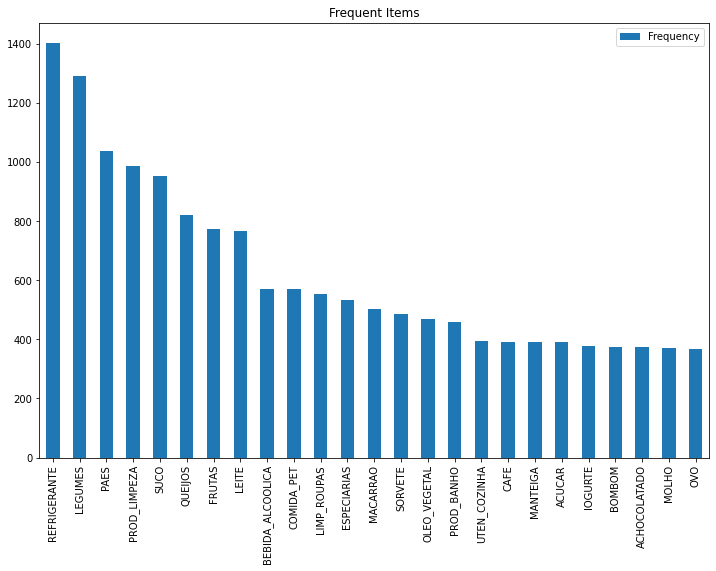

In [ ]:
df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar', figsize=(12,8), title="Frequent Items")
plt.show()

# Mineração de itemsets frequentes e regras de associação

Após visualizarmos os itens mais frequentes nós calculamos os itemsets frequentes (com suporte mínimo de 0.02) e as regras de associação (com confiança mínima de 0.7). As regras obtidas foram ordenadas pelo valor de _lift_ e são exibidas abaixo.


In [ ]:
itemsets = apriori(df, min_support=0.02, use_colnames=True)
display(itemsets)

regras = association_rules(itemsets, metric="confidence", min_threshold=0.7)
# regras = regras.drop_duplicates(subset=regras.columns[2:]).reset_index(drop=True)
regras = regras.sort_values(by="lift", ascending=False).reset_index(drop=True)
display(regras[:20])

,support,itemsets
0,0.049445,(ACHOCOLATADO)
1,0.051824,(ACUCAR)
2,0.023533,(AGUA)
3,0.041777,(ARROZ)
4,0.035034,(BALA)
...,...,...
85,0.022210,"(UTEN_COZINHA, PROD_LIMPEZA)"
86,0.030936,"(QUEIJOS, REFRIGERANTE)"
87,0.020756,"(QUEIJOS, SUCO)"
88,0.023665,"(SUCO, REFRIGERANTE)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CANUDO),(AGUA),0.023533,0.023533,0.023533,1.000000,42.494382,0.022979,inf
1,(AGUA),(CANUDO),0.023533,0.023533,0.023533,1.000000,42.494382,0.022979,inf
2,(COMIDA_CONGELADA),(BATATA_PALHA),0.034506,0.034506,0.034506,1.000000,28.980843,0.033315,inf
3,(BATATA_PALHA),(COMIDA_CONGELADA),0.034506,0.034506,0.034506,1.000000,28.980843,0.033315,inf
4,(BALA),(CHOCOLATE),0.035034,0.035034,0.035034,1.000000,28.543396,0.033807,inf
5,(CHOCOLATE),(BALA),0.035034,0.035034,0.035034,1.000000,28.543396,0.033807,inf
6,(ARROZ),(CHA),0.041777,0.041777,0.041777,1.000000,23.936709,0.040032,inf
7,(CHA),(ARROZ),0.041777,0.041777,0.041777,1.000000,23.936709,0.040032,inf
8,(BOMBOM),(ACHOCOLATADO),0.049445,0.049445,0.049445,1.000000,20.224599,0.047000,inf
9,(ACHOCOLATADO),(BOMBOM),0.049445,0.049445,0.049445,1.000000,20.224599,0.047000,inf


# Rules visualization

## Support x Lift

Este gráfico representa um gráfico de dispersão do support pelo lift das regras de associação obtidas.

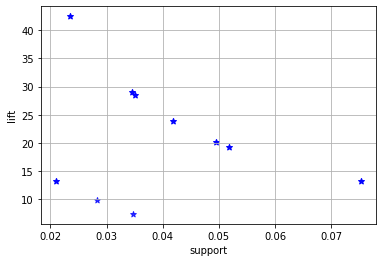

In [ ]:
support=regras.loc[:, 'support']
lift=regras.loc[:, 'lift']
plt.scatter(support, lift, alpha=0.8, marker="*", color='blue')
plt.xlabel('support')
plt.ylabel('lift')
plt.grid()
plt.show()

## Visualizing Rules association

Este gráfico foi utilizado para facilitar a visualização das regras de associação obtidas.

O código fonte utilizado para gerar o gráfico foi obtido em:
https://stackoverflow.com/questions/59701672/visualize-apriori-algorithm

Algumas modificações no código foram feitas para que os erros presentes fossem removidos.

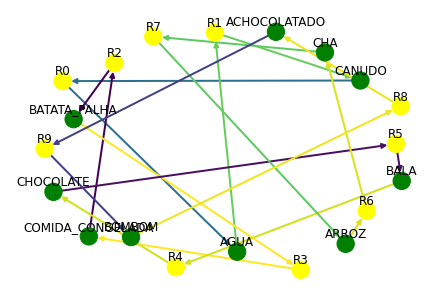

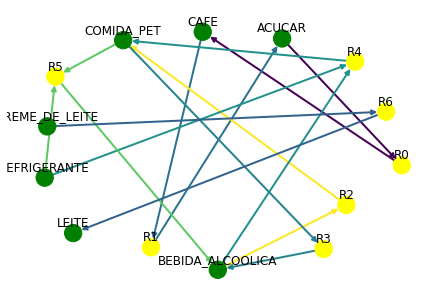

<Figure size 432x288 with 0 Axes>

In [ ]:
import networkx as nx

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs=['R0','R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])

        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a,"R"+str(i),color=colors[i],weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i),c,color=colors[i], weight = 2)
    for node in G1:
        found_a_string=False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color = colors, width=weights, font_size=16, with_labels=False)

    for p in pos:
        pos[p][1] += 0.08
    nx.draw_networkx_labels(G1,pos)
    plt.show()

    support = rules['support'].values
    confidence = rules['confidence'].values

    import seaborn as sns1

    for i in range (len(support)):
        support[i] = support[i]
        confidence[i] = confidence[i]

    plt.title('Association Rules')
    plt.xlabel('support')
    plt.ylabel('confidence')
    sns1.regplot(x=support, y=confidence, fit_reg=False)
    plt.gcf().clear()
draw_graph(regras, 10)
draw_graph(regras[10:], 7)